## Self-organazing map - wines dataset

In [2]:
import minisom 
import pandas as pd
import sklearn
import matplotlib

In [3]:
pd.__version__, sklearn.__version__, matplotlib.__version__

('2.2.2', '1.5.1', '3.9.2')

In [4]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [5]:
data = pd.read_csv('../data/wines/wines.csv')
data

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
X = data.iloc[:, 1:14].values
y = data.iloc[:, 0].values

In [7]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [9]:
normalizer = MinMaxScaler(feature_range=(0, 1))
X = normalizer.fit_transform(X)

X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [10]:
X.shape

(178, 13)

In [11]:
# five times the square root of n 
# n = 178 (number of registers)
# then  five times the square root of 178 is around 65, then we have a 8 x 8 matrix
# so x = 8 and y = 8
som = MiniSom(x = 8, y = 8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2)

In [12]:
som.random_weights_init(X)

In [63]:
som.train_random(data=X, num_iteration=600)

In [64]:
som._weights.shape

(8, 8, 13)

In [65]:
som._activation_map.shape

(8, 8)

In [66]:
som._activation_map

array([[1.35962322, 1.48240403, 1.41045131, 1.15506228, 1.14195349,
        1.00890315, 1.11804723, 1.38734955],
       [1.45177981, 1.40584036, 1.2742183 , 1.18473147, 1.00025869,
        0.79551674, 1.06725074, 1.25994491],
       [1.53314799, 1.48474367, 1.34028105, 1.17671275, 1.00876138,
        1.06354273, 1.08562621, 1.26438033],
       [1.50532175, 1.42269452, 1.44285267, 1.20102826, 0.96344665,
        0.8303722 , 1.12296195, 1.30444052],
       [1.34164942, 1.22934954, 1.25553195, 0.95345555, 0.74910388,
        0.97709234, 1.23143281, 1.26953579],
       [1.3702816 , 1.06059779, 0.6527177 , 0.73151212, 0.68624456,
        0.82188185, 0.88981961, 1.15491413],
       [1.13998209, 0.65896039, 0.60208104, 0.57992158, 0.60376378,
        0.66003956, 0.87768515, 1.3634282 ],
       [1.05286025, 0.7392865 , 0.65420424, 0.36900933, 0.48699813,
        0.78537112, 1.04423609, 1.49345094]])

In [67]:
q = som.activation_response(X)

In [68]:
q.shape

(8, 8)

In [69]:
q

array([[4., 2., 4., 3., 1., 3., 2., 2.],
       [4., 5., 2., 2., 2., 4., 4., 2.],
       [3., 1., 4., 4., 1., 4., 3., 3.],
       [3., 3., 2., 1., 0., 6., 5., 6.],
       [2., 6., 3., 0., 0., 5., 2., 2.],
       [3., 0., 0., 2., 3., 4., 0., 1.],
       [2., 2., 6., 4., 5., 4., 0., 2.],
       [3., 1., 5., 2., 7., 4., 0., 3.]])

In [70]:
# .T represents transpose matrix
som.distance_map().T

array([[0.18062933, 0.27350638, 0.34666326, 0.36871274, 0.48660911,
        0.76091626, 0.6281077 , 0.31103406],
       [0.2787439 , 0.49708286, 0.57193588, 0.50061932, 0.72635665,
        0.90281003, 0.90747187, 0.45339931],
       [0.38889826, 0.53991388, 0.52988942, 0.65385396, 0.69537214,
        0.83433546, 0.80131022, 0.38541934],
       [0.47781153, 0.68622454, 0.66400384, 0.66775663, 0.81411269,
        1.        , 0.66972413, 0.34710566],
       [0.56203661, 0.7977781 , 0.67128286, 0.72476388, 0.80729371,
        0.73354895, 0.68227917, 0.42118281],
       [0.45108242, 0.7734257 , 0.73453906, 0.7248941 , 0.84031324,
        0.78353022, 0.74513126, 0.56413919],
       [0.39609272, 0.66739099, 0.58018478, 0.67395915, 0.95255819,
        0.74880354, 0.78010317, 0.5307252 ],
       [0.33559047, 0.40000093, 0.34134081, 0.35397123, 0.38283546,
        0.43856915, 0.53772819, 0.3183304 ]])

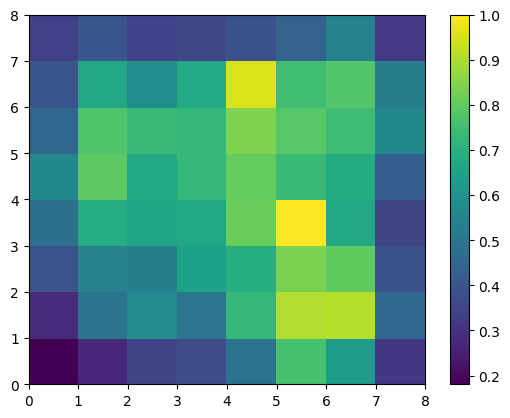

In [71]:
pcolor(som.distance_map().T)
colorbar() # MID ~ mean inter neuropn distance

In [72]:
som.distance_map()

array([[0.18062933, 0.2787439 , 0.38889826, 0.47781153, 0.56203661,
        0.45108242, 0.39609272, 0.33559047],
       [0.27350638, 0.49708286, 0.53991388, 0.68622454, 0.7977781 ,
        0.7734257 , 0.66739099, 0.40000093],
       [0.34666326, 0.57193588, 0.52988942, 0.66400384, 0.67128286,
        0.73453906, 0.58018478, 0.34134081],
       [0.36871274, 0.50061932, 0.65385396, 0.66775663, 0.72476388,
        0.7248941 , 0.67395915, 0.35397123],
       [0.48660911, 0.72635665, 0.69537214, 0.81411269, 0.80729371,
        0.84031324, 0.95255819, 0.38283546],
       [0.76091626, 0.90281003, 0.83433546, 1.        , 0.73354895,
        0.78353022, 0.74880354, 0.43856915],
       [0.6281077 , 0.90747187, 0.80131022, 0.66972413, 0.68227917,
        0.74513126, 0.78010317, 0.53772819],
       [0.31103406, 0.45339931, 0.38541934, 0.34710566, 0.42118281,
        0.56413919, 0.5307252 , 0.3183304 ]])

In [73]:
w = som.winner(X[2])
w

(4, 2)

In [74]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

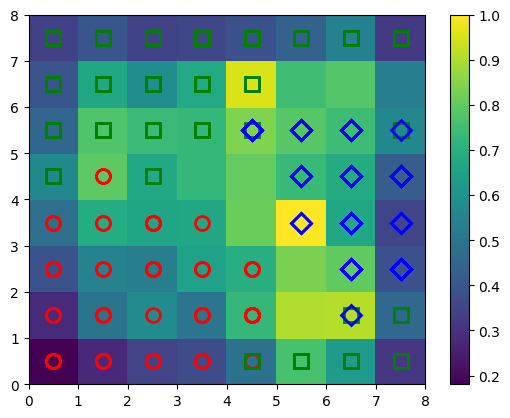

In [75]:
pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
    w = som.winner(x)
    # print(w)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]-1], markerfacecolor='None', markeredgecolor=color[y[i]-1], markeredgewidth=2, markersize=10)